### Лекция 2. Back propogation. Keras.


Теперь, применим алгоритм градиентного спуска к решению задачи поиска оптимальных значений параметров a и b линейной функции:

image.png

для аппроксимации наблюдений image.png.

Критерием качества здесь выступает минимум суммы квадратов ошибок:

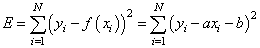

Градиент этого функционала определяется частными производными:

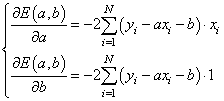

А сам алгоритм примет вид:

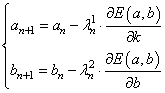

Здесь image.png - шаги сходимости для параметров a и b соответственно.

0.3473387080508105 0.9698557090596035
0.4569785150049637 1.3000088027901882
0.49134934510439177 1.4270109781555456
0.5018915295414084 1.4891291230211352
0.5048956918244668 1.5301648500990264
0.5055207670381696 1.5640028821612997
0.5054003588416174 1.5950531315902792
0.5050516252383941 1.6247245874123162
0.5046381575797694 1.6534755625623416
0.5042115794785782 1.6814630017982608
0.5037880595680037 1.708748120667932
0.5033725425058937 1.7353615371080804
0.5029664226757139 1.761323905063604
0.5025699742952534 1.7866524557068546
0.5021831209148732 1.8113630755186625
0.5018056790132518 1.8354709707623154
0.501437435045513 1.85899088412191
0.5010781697491283 1.8819371693626494
0.5007276657489961 1.9043238208799693
0.5003857098757293 1.926164488818228
0.500052093811848 1.947472489478873
0.4997266142105771 1.9682608140997444
0.49940907264971424 1.9885421369848
0.499099275535308 2.0083288232976613
0.498797033991435 2.0276329366214076
0.49850216374751827 2.046466246320167
0.49821448502676396 2.0

<Figure size 640x480 with 0 Axes>

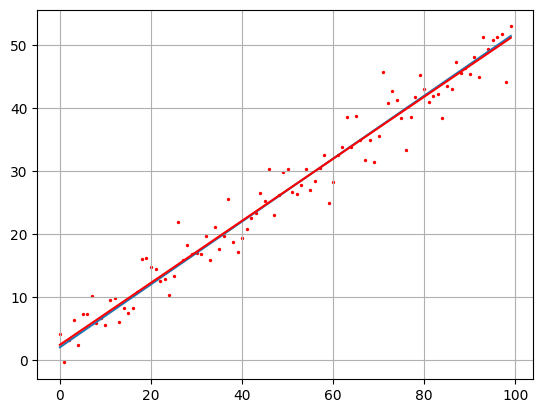

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def E(y, a, b):
    ff = np.array([a * z + b for z in range(N)])
    return np.dot((y-ff).T, (y-ff))

def dEda(y, a, b):
    ff = np.array([a * z + b for z in range(N)])
    return -2*np.dot((y - ff).T, range(N))

def dEdb(y, a, b):
    ff = np.array([a * z + b for z in range(N)])
    return -2*(y - ff).sum()


N = 100       # число экспериментов
Niter = 50 # число итераций
sigma = 3   # стандартное отклонение наблюдаемых значений
at = 0.5     # теоретическое значение параметра k
bt = 2       # теоретическое значение параметра b

aa = 0
bb = 0
lmd1 = 0.000001
lmd2 = 0.0005

f = np.array([at*z+bt for z in range(N)])
y = np.array(f + np.random.normal(0, sigma, N))

a_plt = np.arange(-1, 2, 0.1)
b_plt = np.arange(0, 3, 0.1)
E_plt = np.array([[E(y, a, b) for a in a_plt] for b in b_plt])

plt.ion()   # включение интерактивного режима отображения графиков
fig = plt.figure()
ax = Axes3D(fig)

a, b = np.meshgrid(a_plt, b_plt)
ax.plot_surface(a, b, E_plt, color='y', alpha=0.5)

ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('E')

point = ax.scatter(aa, bb, E(y, aa, bb), c='red')  # отображение точки красным цветом

for n in range(Niter):
    aa = aa - lmd1 * dEda(y, aa, bb)
    bb = bb - lmd2 * dEdb(y, aa, bb)

    ax.scatter(aa, bb, E(y, aa, bb), c='red')

    # перерисовка графика и задержка на 10 мс
    fig.canvas.draw()
    fig.canvas.flush_events()
    time.sleep(0.01)

    print(aa, bb)

plt.ioff()   # выключение интерактивного режима отображения графиков
plt.show()

# отображение графиков аппроксимации
ff = np.array([aa*z+bb for z in range(N)])

plt.scatter(range(N), y, s=2, c='red')
plt.plot(f)
plt.plot(ff, c='red')
plt.grid(True)
plt.show()

Как видим, алгоритм вполне справился со своей задачей и в двумерном случае, причем, мы, фактически, разбили задачу на независимый поиск по каждому параметру. Их связка сохранялась только в выражениях частных производных, но сам алгоритм работал независимо по каждой величине. И это его преимущество – практически линейное увеличение вычислительной сложности при увеличении размерности пространства поиска. Сложность строго оптимальных методов растет в геометрической прогрессии и, начиная с определенного момента, уже 1000 параметров они не применимы для большинства практических задач. Именно поэтому градиентный спуск и получил такую широкую популярность и является ключевым при обучении нейронных сетей, где число изменяемых параметров достигает десятков, а то и сотен тысяч. А в ряде случаев и еще больше.

Методы оптимизации

Итак, при реализации алгоритма наискорейшего спуска, перед разработчиками встают две важные задачи:

избежать попадания в локальный минимум;

обеспечить наибольшую скорость сходимости.

Первая задача решается, преимущественно, выбором нескольких разных начальных приближений подбираемых параметров и последующего отбора лучшего результата.

Вторая задача несколько разнообразнее. Ранее были рассмотрены варианты постоянного шага:

image.png

изменяемого шага:

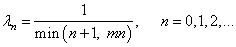

и нормировки градиента. Но это далеко не все известные методы оптимизации. Давайте представим себе, что некая целевая функция имеет следующий вид:

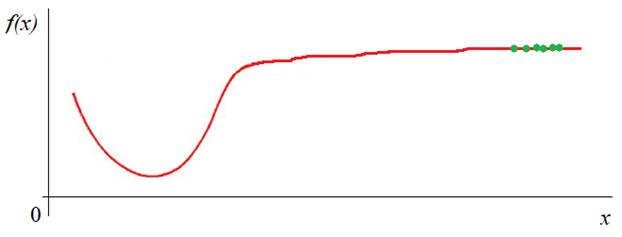

И мы по пологому участку медленно движемся к точке минимума (зеленые точки). То есть, в среднем, имеем однонаправленные градиенты небольших величин:

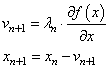

Простой анализ нам подсказывает, что для ускорения сходимости нужно в таких ситуациях увеличивать значения lambda. Один из подходов оптимизации на основе момента предлагает использовать инерционное слагаемое при вычислении корректирующего слагаемого :

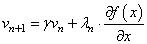

где  обычно выбирается в районе 0,9 и должно быть в пределах:

image.png

Как это работает? Если расписать полученные суммы, например, для , то получим:

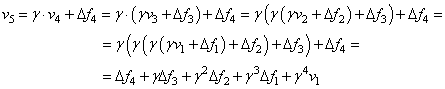

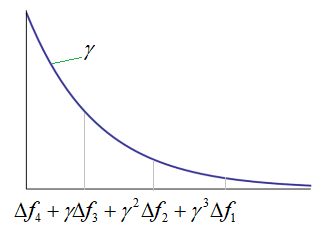

То есть, происходит суммирование градиентов. И, если градиенты преимущественно направлены в одну сторону, то шаг изменения v начинает увеличиваться, следовательно, увеличивается и скорость перемещения по пологому участку графика.

## Ускоренные градиенты Нестерова

Развитие этой идеи привело к идее оптимизации, известной как «ускоренные градиенты Нестерова», которая часто используется в алгоритмах градиентного спуска при обучении нейронных сетей. Отличие от метода с моментом только в том, что текущее значение градиента берется не в точке текущего значения подбираемого параметра:

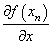

а с учетом накопленного смещения:

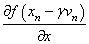

То есть, мы как бы заглядываем наперед и смотрим какое там значение градиента. Как показал опыт, такой подход, в среднем, повышает скорость сходимости градиентного алгоритма.

Существует множество других алгоритмов оптимизации. Работают они по похожим принципам. Основные из них:

Adagrad – учитывает при оптимизации квадраты градиентов;

RMSProp и Adadelta – подобны Adagrad, но пытаются бороться с чрезмерным накоплением квадратов градиентов;

Adam – смесь алгоритма с моментом и квадратов градиентов.

https://habr.com/ru/post/318970/

--------------------------------------------------------------------------------

На предыдущей лекции была рассмотрена НС с выбранными весами или с их ручным установлением, исходя из определенных математических соображений. Это можно сделать, когда сеть относительно небольшая. Но при увеличении числа нейронов и связей, ручной подбор становится попросту невозможным и возникает задача нахождения весовых коэффициентов связей НС. Этот процесс и называют обучением нейронной сети.

Один из распространенных подходов к обучению заключается в последовательном предъявлении НС векторов наблюдений и последующей корректировки весовых коэффициентов так, чтобы выходное значение совпадало с требуемым:

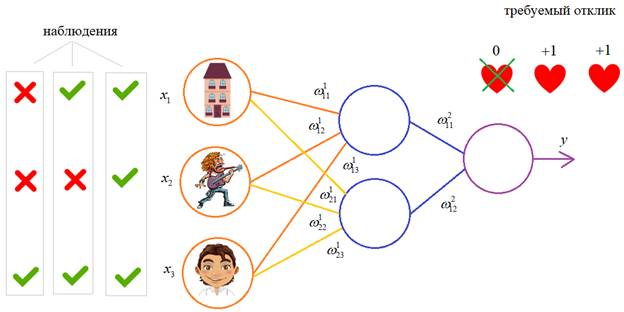

Это называется обучение с учителем, так как для каждого вектора известен нужный ответ и именно его требуем от нашей НС.

Теперь, главный вопрос: как построить алгоритм, который бы наилучшим образом находил весовые коэффициенты. Наилучший – это значит, максимально быстро и с максимально близкими выходными значениями для требуемых откликов. В общем случае эта задача не решена. Нет универсального алгоритма обучения. Поэтому, лучшее, что можно сделать – это выбрать тот алгоритм, который хорошо себя зарекомендовал в прошлом. Основным алгоритмом здесь является алгоритм back propagation (обратного распространения ошибки), который, в свою очередь, базируется на алгоритме градиентного спуска.

Чтобы все лучше понять, предположим, что у нас имеется вот такая полносвязная НС прямого распространения с весами связей, выбранными произвольным образом в диапазоне от [-0.5; 0,5]. Здесь верхний индекс показывает принадлежность к тому или иному слою сети. Также, каждый нейрон имеет некоторую активационную функцию :

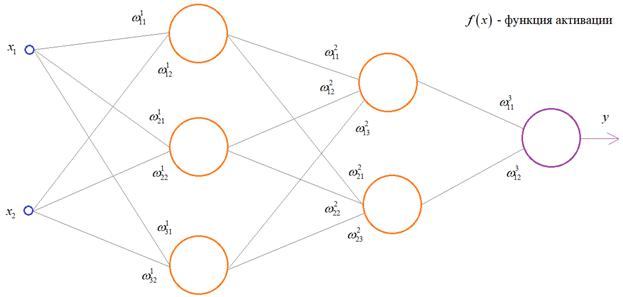

На первом шаге делается прямой проход по сети. Мы пропускаем вектор наблюдения  image.png через эту сеть, и запоминаем все выходные значения нейронов скрытых слоев:

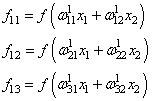

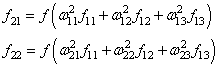

и последнее выходное значение y:

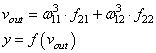

Далее, мы знаем требуемый отклик d для текущего вектора image.png, значит для него можно вычислить ошибку работы НС. Она будет равна:

image.png

Дальше начинается самое главное – корректировка весов. Для этого делается обратный проход по НС: от последнего слоя – к первому.

Итак, у нас есть ошибка e и некая функция активации нейронов image.png. Первое, что нам нужно – это вычислить локальный градиент для выходного нейрона. Это делается по формуле:

image.png

Поясним этот момент. Ранее используемая пороговая функция:

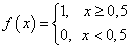

нам уже не подходит, т.к. она не дифференцируема на всем диапазоне значений x. Вместо этого для сетей с небольшим числом слоев, часто применяют или гиперболический тангенс:

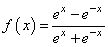

или логистическую функцию:

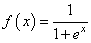

Фактически, они отличаются только тем, что первая дает выходной интервал [-1; 1], а вторая – [0; 1]. И мы уже берем ту, которая нас больше устраивает в данной конкретной ситуации. Например, выберем логистическую функцию.

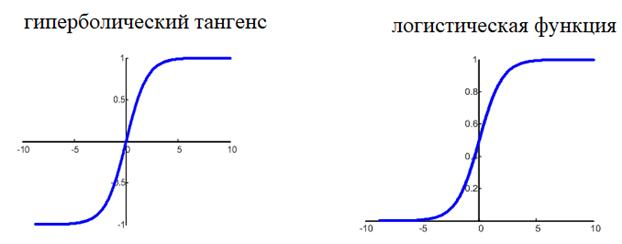

Ее производная функции по аргументу x дает очень простое выражение:

image.png

Именно его мы и запишем в нашу формулу вычисления локального градиента:

image.png

Но, так как

image.png

то локальный градиент последнего нейрона, равен:

image.png

Теперь есть все, чтобы выполнить коррекцию весов. Начнем со связи image.png, формула будет такой:

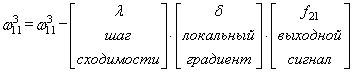

Для второй связи все то же самое, только входной сигнал берется от второго нейрона:

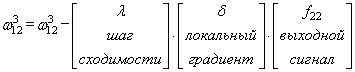

Параметр λ подбирается самостоятельно, вручную самим разработчиком. В самом простом случае можно попробовать следующие значения:

image.png

Итак, связи последнего слоя скорректированы. Переходим к нейрону следующего с конца слоя и для его входящих связей повторим ту же саму процедуру. Но для этого, нужно знать значение его локального градиента. Определяется он просто. Локальный градиент последнего нейрона взвешивается весами входящих в него связей. Полученные значения на каждом нейроне умножаются на производную функции активации, взятую в точках входной суммы:

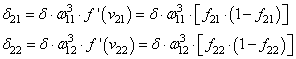

А дальше действуем по такой же самой схеме, корректируем входные связи по той же формуле:

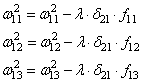

И для второго нейрона:

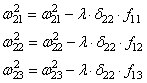

Осталось скорректировать веса первого слоя. Снова вычисляем локальные градиенты для нейронов первого слоя, но так как каждый из них имеет два выхода, то сначала вычисляем сумму от каждого выхода:

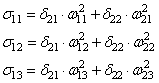

А затем, значения локальных градиентов на нейронах первого скрытого слоя:

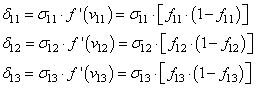

Ну и осталось выполнить коррекцию весов первого слоя все по той же формуле:

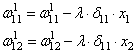

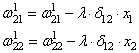

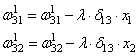

В результате была выполнена одна итерация алгоритма обучения НС. На следующей итерации необходимо взять другой входной вектор из обучающего множества. Лучше всего это сделать случайным образом, чтобы не формировались возможные ложные закономерности в последовательности данных при обучении НС. Повторяя много раз этот процесс, весовые связи будут все точнее описывать обучающую выборку.

Далее, используя необходимый критерий качества необходимо оценить результат работы НС.

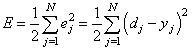

То есть, с помощью алгоритма градиентного спуска веса корректируются так, чтобы минимизировать этот критерий качества работы НС.

Так, в целом выглядит идея работы алгоритма обучения по методу обратного распространения ошибки. Теперь в качестве примера обучим следующую НС:

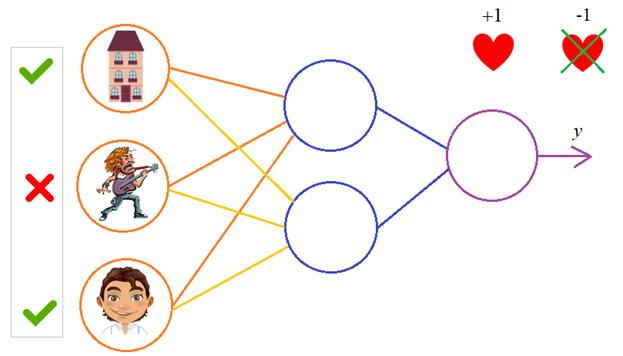

В качестве обучающего множества выберем все возможные варианты (здесь 1 – это да, -1 – это нет):

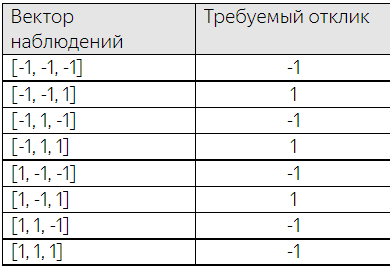

На каждой итерации работы алгоритма, мы будем подавать случайно выбранный вектор и корректировать веса, чтобы приблизиться к значению требуемого отклика.

В качестве активационной функции выберем гиперболический тангенс:

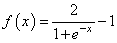

со значением производной:

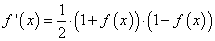

In [ ]:
import numpy as np

def f(x):
    return 2/(1 + np.exp(-x)) - 1

def df(x):
    return 0.5*(1 + x)*(1 - x)

W1 = np.array([[-0.2, 0.3, -0.4], [0.1, -0.3, -0.4]])
W2 = np.array([0.2, 0.3])

def go_forward(inp):
    sum = np.dot(W1, inp)
    out = np.array([f(x) for x in sum])

    sum = np.dot(W2, out)
    y = f(sum)
    return (y, out)

def train(epoch):
    global W2, W1
    lmd = 0.01          # шаг обучения
    N = 10000           # число итераций при обучении
    count = len(epoch)
    for k in range(N):
        x = epoch[np.random.randint(0, count)]  # случайных выбор входного сигнала из обучающей выборки
        y, out = go_forward(x[0:3])             # прямой проход по НС и вычисление выходных значений нейронов
        e = y - x[-1]                           # ошибка
        delta = e*df(y)                         # локальный градиент
        W2[0] = W2[0] - lmd * delta * out[0]    # корректировка веса первой связи
        W2[1] = W2[1] - lmd * delta * out[1]    # корректировка веса второй связи

        delta2 = W2*delta*df(out)               # вектор из 2-х величин локальных градиентов

        # корректировка связей первого слоя
        W1[0, :] = W1[0, :] - np.array(x[0:3]) * delta2[0] * lmd
        W1[1, :] = W1[1, :] - np.array(x[0:3]) * delta2[1] * lmd

# обучающая выборка (она же полная выборка)
epoch = [(-1, -1, -1, -1),
         (-1, -1, 1, 1),
         (-1, 1, -1, -1),
         (-1, 1, 1, 1),
         (1, -1, -1, -1),
         (1, -1, 1, 1),
         (1, 1, -1, -1),
         (1, 1, 1, -1)]

train(epoch)        # запуск обучения сети

# проверка полученных результатов
for x in epoch:
    y, out = go_forward(x[0:3])
    print(f"Выходное значение НС: {y} => {x[-1]}")

Выходное значение НС: -0.04757900952214045 => -1
Выходное значение НС: 0.9280799842814806 => 1
Выходное значение НС: -0.873914852308175 => -1
Выходное значение НС: 0.8702887991776866 => 1
Выходное значение НС: -0.8702887991776864 => -1
Выходное значение НС: 0.873914852308175 => 1
Выходное значение НС: -0.9280799842814805 => -1
Выходное значение НС: 0.04757900952214045 => -1


Теперь рассмотрим несколько принципиальных вопросов, которые возникают в процессе обучения НС:

- как оптимизировать алгоритм градиентного спуска для ускорения обучения;

- как инициализировать начальные значения весовых коэффициентов;

- как выполнять стандартизацию входных данных;

- как готовить обучающую выборку и как ее подавать на вход сети;

- какую функцию активации нейронов выбрать;

- когда останавливать процесс обучения;

- какие критерии качества обучения использовать.

Без знания этих моментов, провести качественное обучение НС практически невозможно.

Итак, начнем с алгоритма обратного распространения, который базируется на алгоритме градиентного спуска. Но раз используется градиентный спуск, то мы сразу получаем все его проблемы реализации. Главная – это попадание в локальный минимум выбранного критерия качества E.

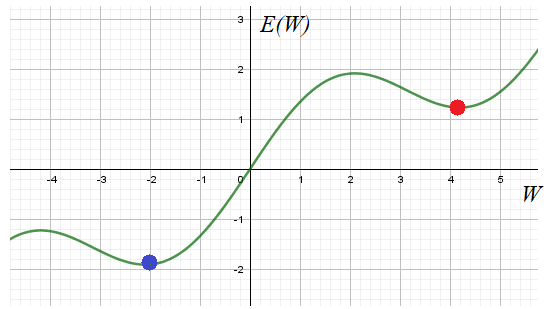

Общего решения этой проблемы нет. Поэтому на практике запускают алгоритм обучения с разными начальными значениями весовых коэффициентов. Тем самым мы, как бы выбираем разные отправные точки на функции E в надежде, что одно из решений достигнет глобального минимума. Хотя, точно узнать: достигли мы дна или нет не представляется возможным. Поэтому процесс обучения останавливают, если достигается требуемое качество работы НС.

Отсюда получаем рекомендацию обучения №1:

Запускать алгоритм для разных начальных значений весовых коэффициентов. И, затем, отобрать лучший вариант. Начальные значения генерируем случайным образом в окрестности нуля, кроме тех, что относятся к bias’ам.

Почему начальные значения весов нужно брать малыми? Допустим, используется логистическая функция активации:

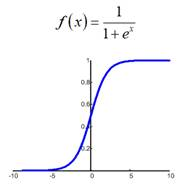

Если веса изначально буду значимыми, то часто суммарный сигнал на входе нейронов будет оказываться большим по модулю:

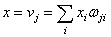

И мы попадаем на пологий участок функции активации. К чему это потом приводит? В процессе обучения градиент этого участка будет мал, а значит, веса будут медленно изменяться, что приведет к торможению обучения НС в целом. Чтобы этого избежать, мы, как раз и выбираем веса с малыми случайными значениями, и оказываемся на более выгодном крутом участке кривой. Bias же (смещения разделяющих гиперплоскостей) могут быть и с большими значениями, т.к. они отвечают именно за смещение разделяющей гиперплоскости и оно может быть значительным.

Другая проблема градиентных алгоритмов – медленная сходимость на пологих участках функции:

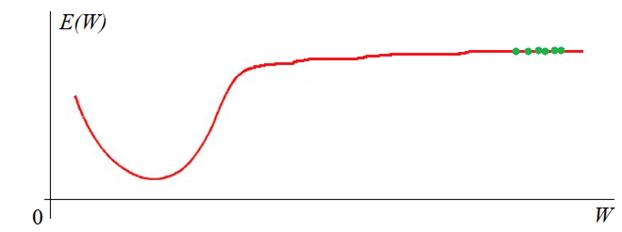

Для ее решения было предложено множество подходов. Среди них наиболее известные, следующие:

оптимизация на основе моментов (momentum);

ускоренные градиенты Нестерова (nesterov momentum);

метод Adagrad;

методы RMSProp и Adadelta;

метод Adam и NAdam.

Итак, рекомендация обучения №2:

Запускаем алгоритм обучения с оптимизацией по Adam или Нестерову для ускорения обучения НС.

Входные значения

Предположим, что у нас имеется обучающая выборка с N наблюдениями:

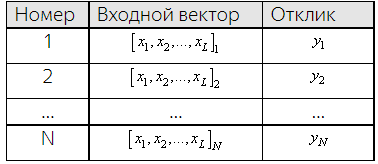

Стоит ли нам подавать значения image.png этой выборки так как они есть? Так делать не рекомендуется. В общем случае, среди этих величин могут оказаться большие значения и они нас сразу переместят в область насыщения функции активации, где производная практически равна нулю:

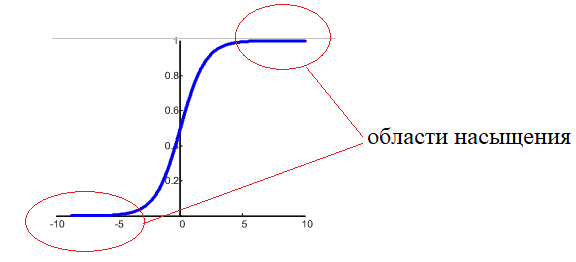

Поэтому на практике выполняют предварительную нормализацию входных значений, например, по формуле:

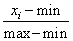

Здесь max, min – максимальное и минимальное значения входных данных по всему обучающему множеству. В результате, входные данные при обучении будут находиться в диапазоне от 0 до 1.

Раз уж сеть обучена на нормированных значениях, то и потом, при ее непосредственной работе, данные также нужно нормировать. Об этом забывать не стоит. И, кроме того, нормировку следует делать через те же самые параметры min и max, которые были использованы в обучающей выборке.

Рекомендация обучения №3:

Выполнять нормировку входных значений и запоминать нормировочные параметры min, max из обучающей выборки.

Как создавать и подавать обучающую выборку

Следующий важный вопрос: что из себя должна представлять обучающая выборка? Какие данные в нее следует поместить? Ответить можно так: чем больше разных наблюдений будет при обучении, тем выше качество работы сети. Здесь ключевое слово – разных, то есть, выборка должна охватывать самые разные «ситуации» в процессе обучения и эти «ситуации» должны появляться с равной частотой. Если в процессе эксплуатации будут попадаться входные данные, сильно отличающиеся от обучающей выборки, то высока вероятность возникновения ошибки. Поэтому желательно, чтобы в обучающей выборке с равной частотой встречались самые разные данные, описывающие какие-то характерные, особенные, частные ситуации.

Рекомендация обучения №4:

Помещать в обучающую выборку самые разнообразные данные примерно равного количества.

Слудующий вопрос, какой объем обучающей выборки N следует брать? По идее, чем больше, тем лучше. Например, в литературе отмечают, что при классификации картинок (например, на мужчин и женщин, или кошек и собак и т.п.) необходимо по 5 000 000 наблюдений для каждого класса, тогда можно достичь хороших результатов различения. Если увеличить этот объем до 10 000 000, то есть шанс обучить нейросеть распознавать образы лучше человека. Данные для обучения – это как нефть «черное золото» для нашей экономики, они ценятся очень высоко, а их подготовка может потребовать немалых ресурсов и времени. Это еще одна причина, по которой нейронные сети лишь недавно завоевали свое место под солнцем: раньше практически невозможно было получить столько реальных данных. Теперь же, сеть Интернет, в частности, социальные сети, предоставляют весьма богатый материал.

Итак, предположим, что мы создали обучающую выборку и собираемся приступить к обучению. Здесь возникает новый вопрос: как ее подавать на вход сети? В самом простом варианте, мы сначала перемешиваем наблюдения в выборке (чтобы они шли в случайном порядке), а затем поочередно подаем на вход. При этом для каждого наблюдения выполняем корректировку весовых коэффициентов.

Но это не самый лучший вариант. Было замечено, что в процессе обучения часть наблюдений дают небольшой положительный прирост весовых коэффициентов, часть – небольшой отрицательный. В сумме они практически компенсируют друг друга и изменение весов практически не происходит. И лишь некоторая часть наблюдений из выборки приводит к их заметному изменению. Чтобы не «крутить» вхолостую весовые коэффициенты, коррекцию выполняют не сразу для каждого наблюдения, а после прогонки через сеть некоторого их количества. Такое множество получило название batch или, в последнее время чаще стали говорить mini-batch. А вся выборка получила название эпоха. Так вот, прогоняя mini-batch через сеть, суммируют локальные градиенты на каждом нейроне, а затем, корректируют веса по результирующей их сумме. В процессе такого суммирования небольшие положительные и отрицательные значения будут скомпенсированы и останется полезное смещение, которое и приведет к изменению весов в пределах mini-batch.

Такая идея позволила сократить время обучения в разы, что очень важно, так как для больших НС общее время обучения составляет иногда дни, недели и даже месяцы. Поэтому сокращение этого времени в несколько раз открывает новые горизонты применения НС.

Когда целесообразно разбивать выборку на серию mini-batch? Считается, что для этого общее число выборки должно составлять от нескольких тысяч и более. Если наблюдений меньше, порядка тысячи, то ее можно воспринимать как один единственный mini-batch.

Итак, мы получаем рекомендацию обучения №5:

Наблюдения на вход сети подавать случайным образом, корректировать веса после серии наблюдений, разбитых на mini-batch.

Значение критерия качества вычисляется только после прогонки всей эпохи. Если оно нас не устраивает (как правило, так и есть), то наблюдения снова тасуются случайным образом и обучение продолжается. В конце каждой эпохи снова и снова пересчитывается критерий качества. Получается такой график:

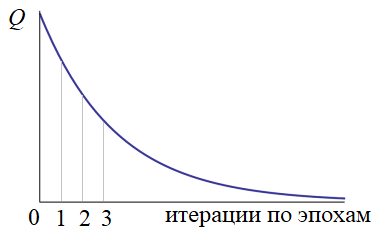

Конечно, это идеализированный график. В реальности он, конечно, не такой гладкий и монотонный. Нередки случаи когда он может внезапно возрастать.


In [ ]:
!pip install tensorflow mnist matplotlib numpy

# Загрузка данных

In [ ]:
import mnist

# The first time you run this might be a bit slow, since the
# mnist package has to download and cache the data.
train_images = mnist.train_images()
train_labels = mnist.train_labels()

test_images = mnist.test_images()
test_labels = mnist.test_labels()

# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

print(train_images.shape) # (60000, 28, 28)
print(train_labels.shape) # (60000,)

(60000, 28, 28)
(60000,)


Визуализируем данные

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 9, figsize=(10, 5))
fig.suptitle('MNIST', fontsize=20)
n = 0
for ax in axes.flat:
    ax.set_yticks([])
    ax.set_xticks([])
    ax.imshow(train_images[n], cmap='Greys')
    n += 1

In [ ]:
test_labels[:18]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7], dtype=uint8)

In [ ]:
28*28

784

In [ ]:
import numpy as np

In [ ]:
# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

print(train_images.shape) # (60000, 784)
print(test_images.shape)  # (10000, 784)

(60000, 784)
(10000, 784)


# Создание модели

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# define the keras model
model = Sequential()
model.add(Dense(64, input_dim=784, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
# альтернативная запись
model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])


In [ ]:
# слой нейронной сети, который осуществляет операцию flatten
# можно применять вместо reshape

# from tensorflow.keras.layers import Flatten

# model = Sequential([
#   Flatten(input_shape=(28, 28)),
#   Dense(64, activation='relu'),
#   Dense(64, activation='relu'),
#   Dense(10, activation='softmax'),
# ])


# Компиляция модели

In [ ]:
# создание keras модели
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Обучение нейронной сети

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
len(train_labels)

60000

In [ ]:
1875 * 32

60000

In [ ]:
%%time
model.fit(train_images,
          to_categorical(train_labels),
          epochs=5,
          batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3620 - accuracy: 0.8927
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1860 - accuracy: 0.9433
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1453 - accuracy: 0.9546
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1192 - accuracy: 0.9634
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1056 - accuracy: 0.9673
CPU times: user 49.1 s, sys: 3.04 s, total: 52.1 s
Wall time: 1min 24s


# Оценка обученности нейронной сети

In [ ]:
# Evaluate the model.
model.evaluate(
  test_images,
  to_categorical(test_labels)
)

313/313 [==============================] - 1s 3ms/step - loss: 0.1119 - accuracy: 0.9646


[0.11189281195402145, 0.9646000266075134]

In [ ]:
test_labels[0]

7

In [ ]:
model.predict(test_images)[0]

313/313 [==============================] - 1s 3ms/step


array([1.0136247e-06, 7.0714301e-09, 1.7693505e-05, 2.1971667e-03,
       2.7597985e-10, 4.4221320e-06, 5.3013344e-11, 9.9766737e-01,
       7.1604110e-05, 4.0829349e-05], dtype=float32)

# Сохранить и загрузить веса

In [ ]:
# Save the model to disk.
model.save_weights('model.h5')

# Load the model from disk later using:
model.load_weights('model.h5')

# Запуск нейронной сети для выполнения работы

In [ ]:
import numpy as np

# Predict on the first 5 test images.
predictions = model.predict(test_images[:5])

1/1 [==============================] - 0s 24ms/step


In [ ]:
# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(test_labels[:5]) # [7, 2, 1, 0, 4]


[7 2 1 0 4]
[7 2 1 0 4]
